In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [ ]:
%pip install kneed

In [13]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [14]:
train.head()

,selling_price,new-price,km_driven,owner_type,mileage,engine,max_power,seats,transmission_type_0,transmission_type_1,...,name_111,name_112,name_113,name_114,name_115,name_116,name_117,name_118,name_119,yearsOld
0,39.00,74.410,49.0,1,16.55,2993,258.00,5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,5.40,14.950,104.5,1,22.32,1582,126.30,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2,5.89,14.275,38.2,1,17.40,1497,117.30,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,4.50,10.670,90.0,1,18.60,1197,81.83,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,2.90,8.950,85.0,1,16.47,1198,74.00,5,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0


In [15]:
X_train = train.drop(['selling_price'], axis=1).copy()
y_train = train['selling_price'].copy()

X_test = test.drop(['selling_price'], axis=1).copy()
y_test = test['selling_price'].copy()

In [83]:
X_train.columns

Index(['new-price', 'km_driven', 'owner_type', 'mileage', 'engine',
       'max_power', 'seats', 'transmission_type_Manual', 'fuel_type_Diesel',
       'fuel_type_Electric',
       ...
       'name_toyota glanza', 'name_toyota innova', 'name_toyota yaris',
       'name_volkswagen polo', 'name_volkswagen vento', 'name_volvo s90',
       'name_volvo xc', 'name_volvo xc60', 'name_volvo xc90', 'yearsOld'],
      dtype='object', length=133)

In [58]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
pca.fit(X_train)
pca_X_train = pd.DataFrame(pca.transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))


In [59]:
pca_X_test.head()

,0,1
0,505.535135,-32.494170
1,-122.627426,6.187247
2,-296.691265,-28.642867
3,2.639972,-32.028773
4,2.535789,-1.871504


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_test = pd.DataFrame(scaler.transform(X_test))

In [17]:
scaled_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.808706,0.012869,0.0,0.493441,0.723996,0.676717,0.428571,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137931
1,0.127606,0.027474,0.0,0.665474,0.382680,0.267330,0.428571,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275862
2,0.119874,0.010027,0.0,0.518784,0.362119,0.239353,0.428571,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206897
3,0.078580,0.023659,0.0,0.554562,0.289550,0.129095,0.428571,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241379
4,0.058877,0.022343,0.0,0.491055,0.289792,0.104756,0.428571,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.241379


# Clustering Algorithms

## K-Means 

### Find the value of K using Elbow method

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_X_train)
    wcss.append(kmeans.inertia_)

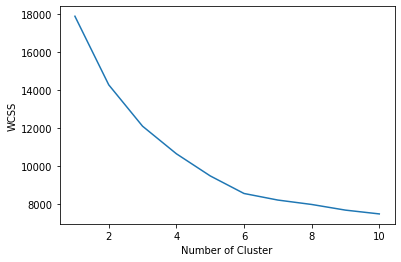

In [19]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [20]:
kneeLocator = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kneeLocator.knee

5

### Save the train and test dataset with cluster number 

In [89]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans.fit(scaled_X_train)

KMeans(n_clusters=3, random_state=42)

In [90]:
scaled_train = scaled_X_train.copy()
scaled_test = scaled_X_test.copy()

scaled_train['selling_price'] = y_train
scaled_test['selling_price'] = y_test

scaled_train['cluster'] = kmeans.predict(scaled_X_train)
scaled_test['cluster'] = kmeans.predict(scaled_X_test)

In [91]:
scaled_train.to_csv('../data/train_cluster.csv', index=False)
scaled_test.to_csv('../data/test_cluster.csv', index=False)